# ***AIR BNB NYC - 2019 Analysis Report ***

Problem Overview: To analyze the air bnb data and give recommendations on the basis of data while converting it into meaningful information.

In [1]:
### Objectives:
# Which types of hosts should Airbnb prioritize acquiring, and in which locations?
# How can customers be segmented based on their preferences?
# Which neighborhoods should Airbnb target for growth?
# What are the preferred price ranges for customers?
# What types of properties best align with customer preferences?
# What improvements can be made to make properties more appealing to customers?
# Which localities and properties are the most popular?
# How can less popular properties increase their appeal and attract more customers?

STEPS OF EXECUTION

1. Import Libraries and load data

In [2]:
#Import Libraries and load data
!pip install plotly
!pip install altair vega_datasets
!pip install pyspan
!pip install --upgrade yfinance

# for data cleaning
import pyspan as ps

# data processing
import pandas as pd

#linear algebra
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#stock related missing info
import yfinance as yf

# ignoring the warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 73.9 MB/s eta 0:00:00


In [3]:
# control warnings
import warnings
warnings.filterwarnings("ignore")

2. Load the Airbnb data

In [4]:
# Step 2: Load the Airbnb data
file_path = '/content/AB_NYC_2019.csv'
airbnb = pd.read_csv(file_path)

# Quick check to see the structure of the data
airbnb.head()  # View first few rows


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


3. Check the structure of the Dataset

In [5]:
# Check the rows and columns of the dataset
airbnb.shape

(48895, 16)

In [6]:
#what other columns do we have
len(airbnb.columns)

16

In [7]:
#show column names
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Understanding the data structure

In [8]:
#Get the summary of the data frame
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
#Statistics
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


4. Data Cleaning

Handling missing data

In [10]:
#handle null values
pd.set_option('display.max_rows', None)
airbnb.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [11]:
#Check duplicates
duplicate_rows = airbnb.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [12]:
#replace null values "name"

airbnb = ps.handle_nulls(airbnb, columns = 'name', action = 'replace', with_val = "Unknown")

airbnb['name'].value_counts()["Unknown"]

16

In [13]:
# Remove unncessary columns
airbnb = ps.remove(airbnb, operation='columns', columns=['id','name', 'host_id'], inplace=False)

airbnb.head()

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [14]:
# Fill missing values in 'reviews_per_month' and drop unnecessary columns

airbnb.fillna({'reviews_per_month': 0}, inplace=True)

#airbnb.drop(['id', 'name', 'last_review', 'host_id'], axis=1, inplace=True)

# Check the result
airbnb.head()


,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [15]:
# recheck null values of reviews_per_month feature
airbnb.reviews_per_month.isnull().sum()

0

In [16]:
airbnb.head()

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [17]:
# Convert 'last_review' to datetime
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'])


In [18]:
airbnb.head()

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**EXPLORATORY DATA ANALYSIS**

5. Remove Outliers

In [19]:
# Remove outliers
import pandas as pd


# Show the initial shape of the dataset
print("Initial dataset shape:", airbnb.shape)

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'price' column
Q1 = airbnb['price'].quantile(0.25)
Q3 = airbnb['price'].quantile(0.75)
IQR = Q3 - Q1

# Determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
data_cleaned = airbnb[(airbnb['price'] >= lower_bound) & (airbnb['price'] <= upper_bound)]

# Show the shape of the cleaned dataset
print("Cleaned dataset shape:", data_cleaned.shape)

# Optionally, display the first few rows of the cleaned dataset
print(data_cleaned.head())


Initial dataset shape: (48895, 13)
Cleaned dataset shape: (45923, 13)
     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaT   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_h

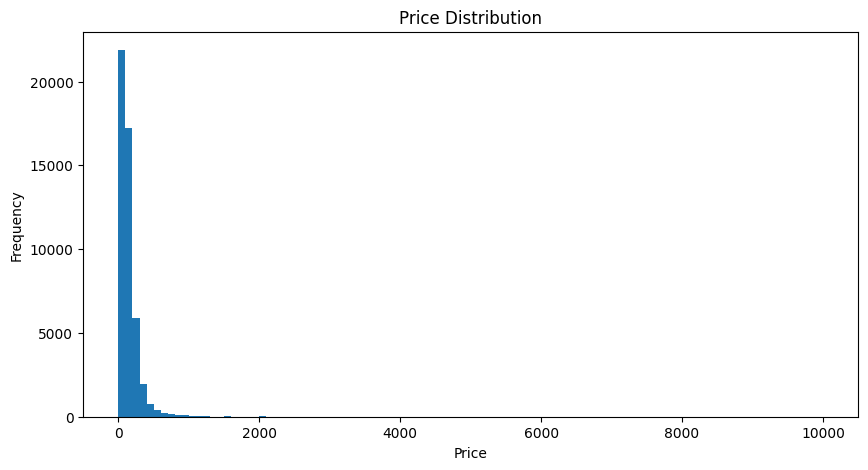

In [20]:
# Price Outliers
#Min.night outliers
#number of Reviews

# Plot price distribution
plt.figure(figsize=(10,5))
plt.hist(airbnb['price'], bins=100)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()


In [21]:
airbnb.price.describe()

,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


In [22]:
# Drop price above 800$
airbnb = airbnb[airbnb.price < 800]

In [23]:
# Check the percentage of price range above 800$
airbnb[airbnb['price'] > 800].shape[0]/airbnb.shape[0]*100

0.0

In [24]:
airbnb.head()

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Minimum Night Distribution


In [25]:
# minimum Outliers
# Check minimum nights distribution
airbnb.minimum_nights.describe()


,minimum_nights
count,48421.000000
mean,6.979596
std,20.291590
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,1250.000000


In [26]:
# Check the percentage of minimum night above 31 nights$
airbnb[airbnb['minimum_nights'] > 31].shape[0]/airbnb.shape[0]*100

1.0739142107763162

In [27]:
# Drop listings with minimum nights > 31
airbnb = airbnb[airbnb.minimum_nights < 31]

<Axes: >

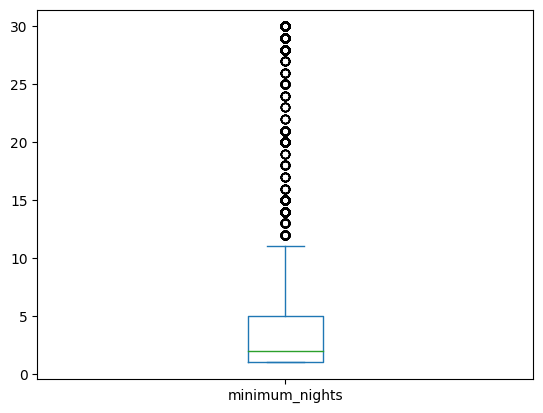

In [28]:
# Recheck the distribution of minimum night
airbnb.minimum_nights.plot.box()

Number of Reviews

In [29]:
airbnb.number_of_reviews.describe()

,number_of_reviews
count,47703.000000
mean,23.601241
std,44.860305
min,0.000000
25%,1.000000
50%,5.000000
75%,24.000000
max,629.000000


In [30]:
# Percentage of reviews amount above 100
airbnb[airbnb.number_of_reviews > 300].shape[0]/airbnb.shape[0]*100

0.27461585225247886

In [31]:
#Hosts with more than 300 reviews are considered outliers and will be dropped.
# Drop listings with more than 300 reviews
airbnb = airbnb[airbnb.number_of_reviews < 300]


In [32]:
# Checking the distribution of availibility
airbnb.availability_365.describe()

,availability_365
count,47572.00000
mean,110.89086
std,130.86856
min,0.00000
25%,0.00000
50%,42.00000
75%,221.00000
max,365.00000


In [33]:
#check percentage of availability
(airbnb.availability_365.eq(0).sum())/airbnb.shape[0]*100

36.296561002270245

Remove Irrelavant columns

In [34]:
# Drop 'availability_365' column
airbnb.drop(columns=['availability_365'], inplace=True)


Reviews per month

In [35]:
airbnb.reviews_per_month.describe()

,reviews_per_month
count,47572.000000
mean,1.092862
std,1.571399
min,0.000000
25%,0.040000
50%,0.380000
75%,1.610000
max,58.500000


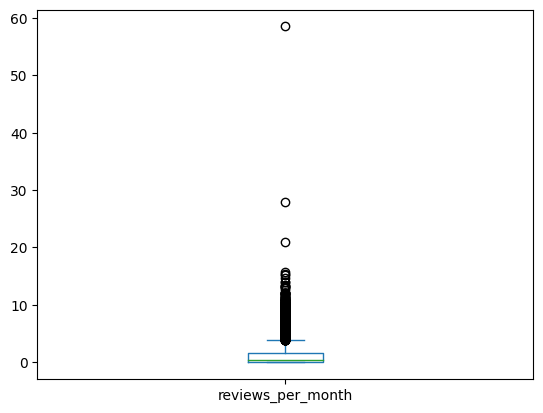

In [36]:
airbnb.reviews_per_month.plot.box()
plt.show()

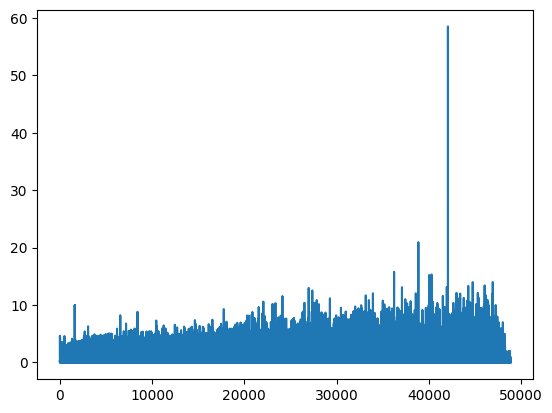

In [37]:
# plot graph
plt.plot(airbnb["reviews_per_month"])

Availability

Around 36% of the hosts have an availability of zero. Therefore, the availability column does not hold statistical significance. Therefore, we will drop this column.

6. Correlation Analysis

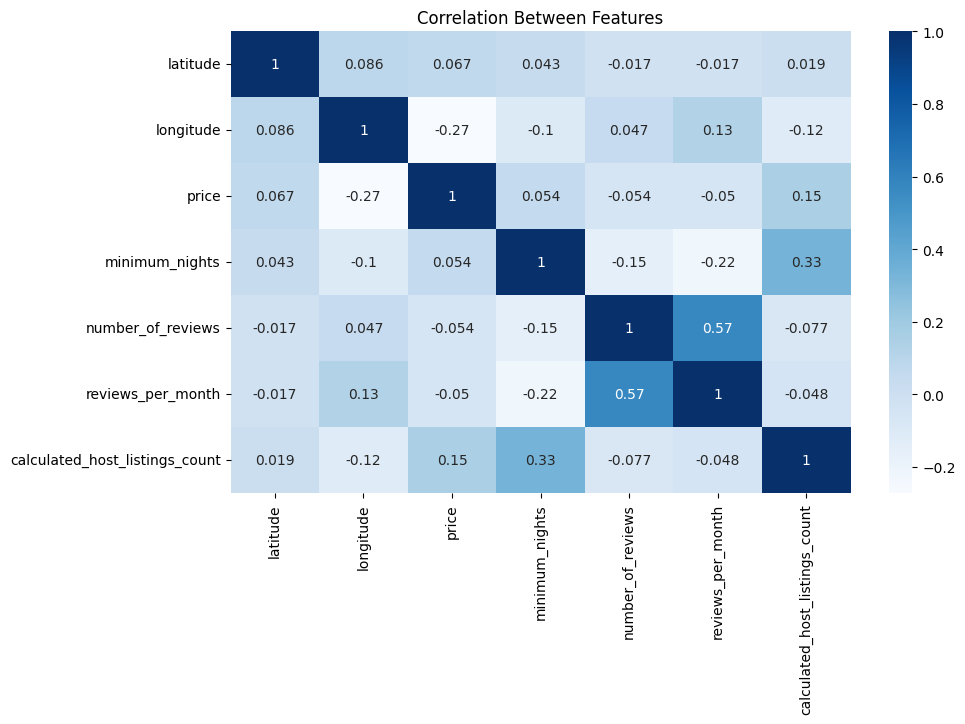

In [38]:
# Import seaborn and matplotlib in case they were not properly loaded
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that you're in an interactive environment
%matplotlib inline

# Check if the dataset contains only numeric data for correlation
numeric_data = airbnb.select_dtypes(include=[np.number])

# If the dataset contains numeric values, proceed to correlation
if not numeric_data.empty:
    plt.figure(figsize=(10,6))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='Blues')
    plt.title('Correlation Between Features')
    plt.show()
else:
    print("No numeric data available for correlation.")


Univariate and multivariate analysis

Which types of hosts should Airbnb prioritize acquiring, and in which locations?

**Top 10 Hosts by Neighbourhood Group**

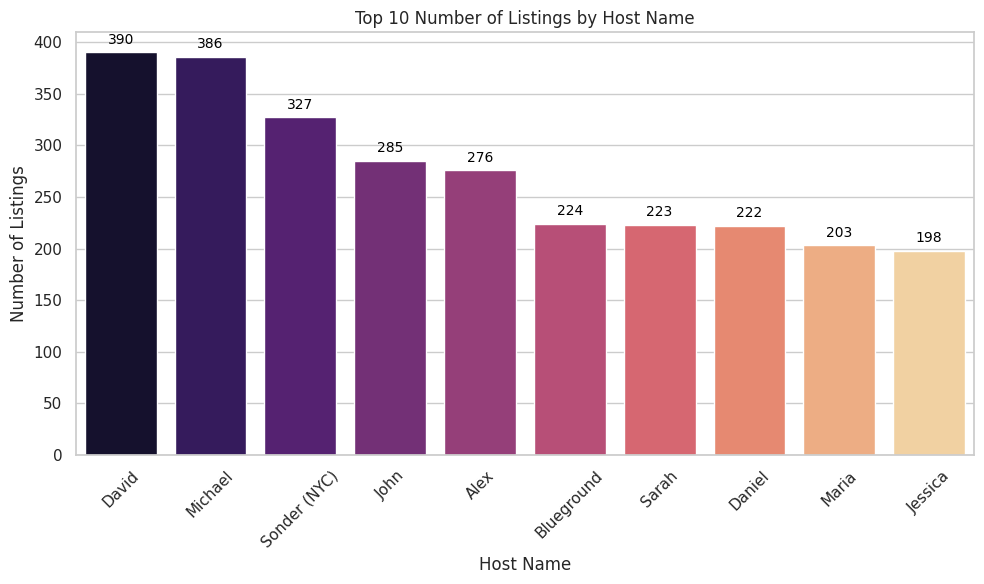

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot number of hosts by host name
host_count = airbnb.host_name.value_counts().head(10)
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

# Use a different palette (coolwarm in this example)
ax = sns.barplot(x=host_count.index, y=host_count.values, palette='magma')

# Add value labels to the bars
for value in ax.containers:
    ax.bar_label(value, fmt='{:,.0f}', label_type='edge', fontsize=10, color='black', padding=4)

# Fix typos in xlabel and ylabel
plt.xticks(rotation=45)
plt.xlabel("Host Name")
plt.ylabel("Number of Listings")
plt.title("Top 10 Number of Listings by Host Name")

plt.tight_layout()
plt.show()


**Insight**:  
The top 10 hosts mainly provide Entire Home/Apartment and Private Room rentals, with prices ranging from $190 to $400.

**Recommendation**:  
Airbnb should focus on acquiring hosts that offer Entire Home/Apartment and Private Room rentals within the price range of $190 to $400, particularly in Manhattan and Brooklyn.

Which neighborhoods should Airbnb target for growth?

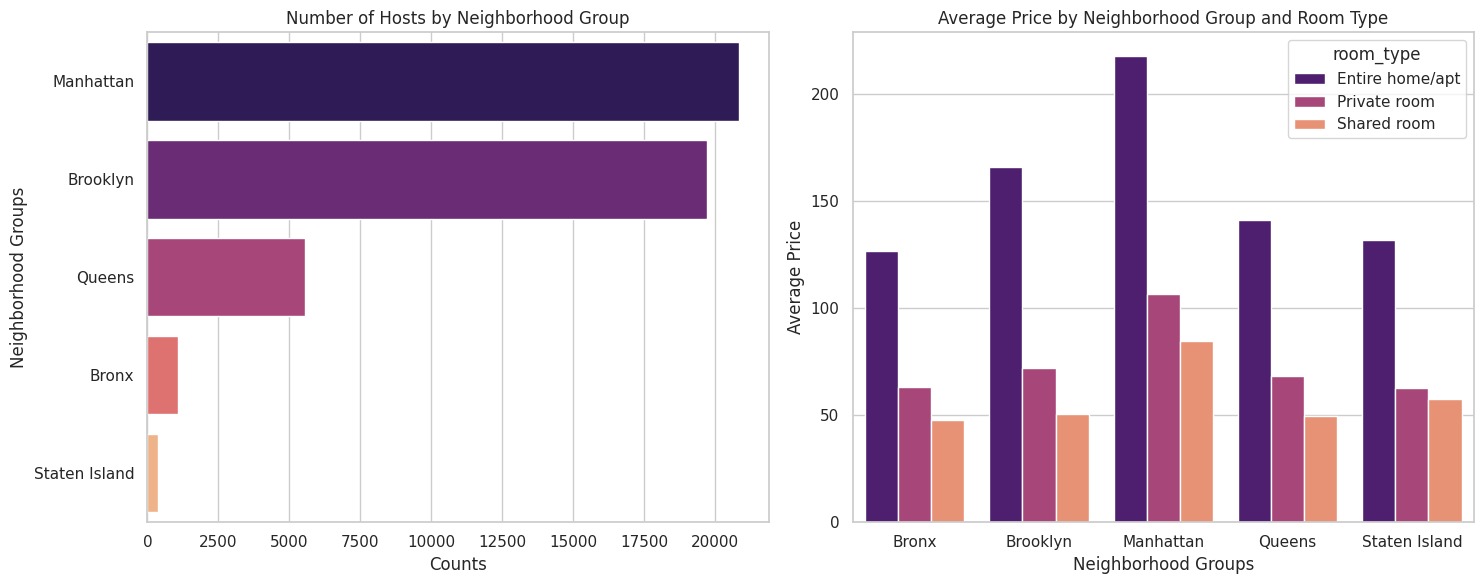

In [40]:
# Step 1: Group count of hosts and mean price per neighborhood group and room type
group_count = airbnb['neighbourhood_group'].value_counts()
price_mean = airbnb.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()

# Step 2: Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Number of hosts by neighborhood group
sns.barplot(x=group_count.values, y=group_count.index, palette='magma', ax=axes[0])
axes[0].set_title("Number of Hosts by Neighborhood Group")
axes[0].set_xlabel("Counts")
axes[0].set_ylabel("Neighborhood Groups")

# Plot 2: Average price by neighborhood group and room type
sns.barplot(data=price_mean, x='neighbourhood_group', y='price', hue='room_type', palette='magma', ax=axes[1])
axes[1].set_title("Average Price by Neighborhood Group and Room Type")
axes[1].set_xlabel("Neighborhood Groups")
axes[1].set_ylabel("Average Price")

# Step 3: Adjust layout and show plot
plt.tight_layout()
plt.show()


**Insight**:  
Most listings are concentrated in Manhattan and Brooklyn, with prices in these areas being significantly higher compared to other neighborhoods. Listings priced above $300 make up more than 10% of the total, while the other three neighborhood groups each have fewer than 10% of the listings.

**Recommendation**:  
Given the high demand in Manhattan and Brooklyn, Airbnb should focus more resources and marketing efforts on these areas to attract more guests and boost revenue.

What are the preferred price ranges for customers?

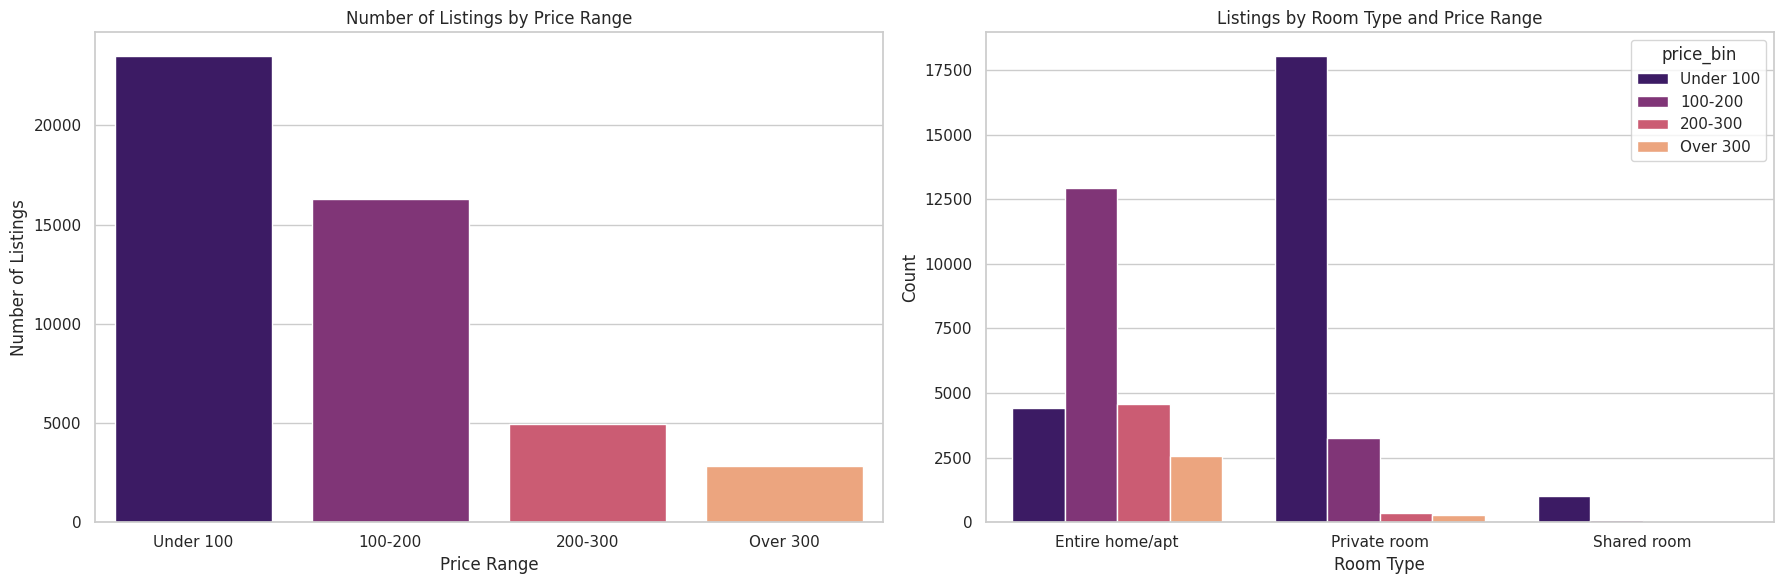

In [41]:
# Step 1: Create price bins
price_bins = [0, 100, 200, 300, float('inf')]
price_labels = ['Under 100', '100-200', '200-300', 'Over 300']

airbnb['price_bin'] = pd.cut(airbnb['price'], bins=price_bins, labels=price_labels)

# Step 2: Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Count of listings by price range
sns.countplot(x='price_bin', data=airbnb, palette='magma', ax=axes[0])
axes[0].set_xlabel("Price Range")
axes[0].set_ylabel("Number of Listings")
axes[0].set_title("Number of Listings by Price Range")

# Plot 2: Count of listings by room type and price range
ax2_data = airbnb.groupby(['room_type', 'price_bin']).size().reset_index(name='count')

sns.barplot(x='room_type', y='count', hue='price_bin', data=ax2_data, palette='magma', ax=axes[1])
axes[1].set_xlabel("Room Type")
axes[1].set_ylabel("Count")
axes[1].set_title("Listings by Room Type and Price Range")

# Step 3: Display the plot
plt.tight_layout()
plt.show()


What types of properties best align with customer preferences?

Different types of properties align with customer preferences. Existing properties can be adjusted to better meet these preferences by improving amenities, design, or pricing to enhance guest satisfaction.

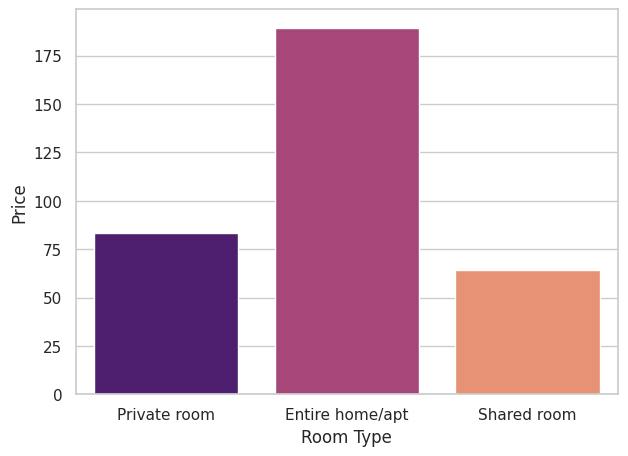

In [42]:
plt.figure(figsize = (7,5))
ax = sns.barplot(data = airbnb, x = 'room_type', y = 'price', estimator = 'average', ci=None, palette = 'magma')
ax.set_xlabel("Room Type")
ax.set_ylabel("Price")
plt.show()


**Insight**:  
Entire Home/Apartment rentals are nearly twice as expensive as other room types.

**Recommendation**:  
Target customers seeking a premium, exclusive experience to capitalize on the higher prices of Entire Home/Apartment rentals.

What improvements can be made to make properties more appealing to customers?

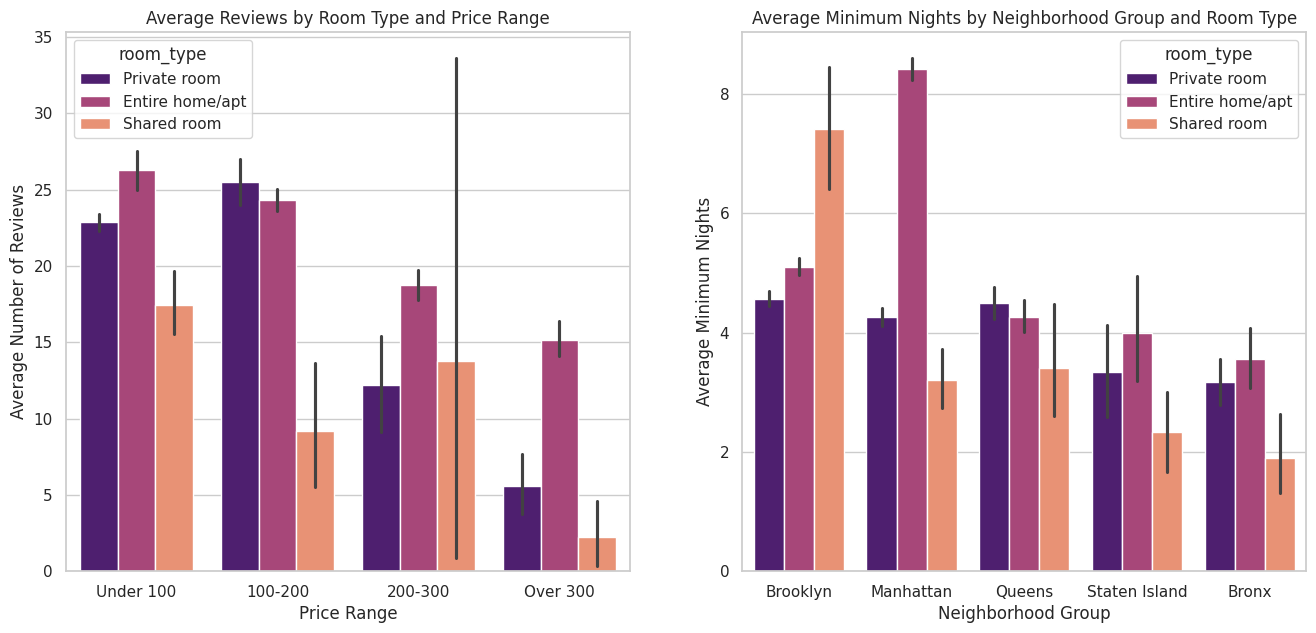

In [43]:
# Customer reviews
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Average number of reviews by price range and room type
sns.barplot(data=airbnb, x='price_bin', y='number_of_reviews', hue='room_type', estimator='mean', palette='magma', ax=axes[0])
axes[0].set(xlabel="Price Range", ylabel="Average Number of Reviews", title="Average Reviews by Room Type and Price Range")

# Plot 2: Average minimum nights by neighborhood group and room type
sns.barplot(data=airbnb, x='neighbourhood_group', y='minimum_nights', hue='room_type', estimator='mean', palette='magma', ax=axes[1])
axes[1].set(xlabel="Neighborhood Group", ylabel="Average Minimum Nights", title="Average Minimum Nights by Neighborhood Group and Room Type")

# Show the plots
plt.show()


Which localities and properties are the most popular?

In [44]:
import pandas as pd
import plotly.express as px

# Step 2: Count the number of listings by locality and room type
popularity_data = airbnb.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='count')

# Step 3: Create a dynamic bar chart using Plotly with a different theme
fig = px.bar(
    popularity_data,
    x='neighbourhood_group',
    y='count',
    color='room_type',
    title='Most Popular Localities and Room Types',
    labels={'neighbourhood_group': 'Locality', 'count': 'Number of Listings'},
    text='count',  # Show counts on the bars
    template='plotly'  # Use a different available theme
)

# Step 4: Customize the layout
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(barmode='stack', xaxis_title='Locality', yaxis_title='Number of Listings', xaxis_tickangle=-45)

# Step 5: Show the plot
fig.show()


### Insight:
Popular localities, especially Manhattan and Brooklyn, have a higher number of listings across various room types.

### Recommendation:
Focus marketing efforts on these key areas to boost bookings and showcase diverse room types to attract more guests.

How can less popular properties increase their appeal and attract more customers?

In [45]:
import pandas as pd
import plotly.express as px


# Step 2: Filter for less popular properties (e.g., properties with fewer than a certain number of reviews)
less_popular_threshold = 20  # You can adjust this threshold based on your analysis
less_popular_properties = airbnb[airbnb['number_of_reviews'] < less_popular_threshold]

# Step 3: Calculate average price by room type for less popular properties
avg_price_data = less_popular_properties.groupby('room_type')['price'].mean().reset_index()

# Step 4: Create a bar chart to visualize average prices of less popular properties by room type
fig = px.bar(
    avg_price_data,
    x='room_type',
    y='price',
    title='Average Price of Less Popular Properties by Room Type',
    labels={'room_type': 'Room Type', 'price': 'Average Price'},
    text='price',
    template='plotly'
)

# Step 5: Customize the layout
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_title='Room Type', yaxis_title='Average Price', xaxis_tickangle=-45)

# Step 6: Show the plot
fig.show()


### Insights:
- Less popular properties often have lower prices but may lack sufficient reviews, indicating limited customer engagement.
- Room types with average prices can vary significantly, suggesting opportunities for strategic pricing adjustments.

### Recommendations:
- **Enhance Visibility**: Improve marketing efforts for properties with fewer reviews.
- **Adjust Pricing**: Consider competitive pricing strategies for less popular room types to attract more customers.
- **Boost Amenities**: Add appealing amenities to increase desirability and encourage positive reviews.

Correlations between Key Metrices

<Figure size 1500x1200 with 0 Axes>

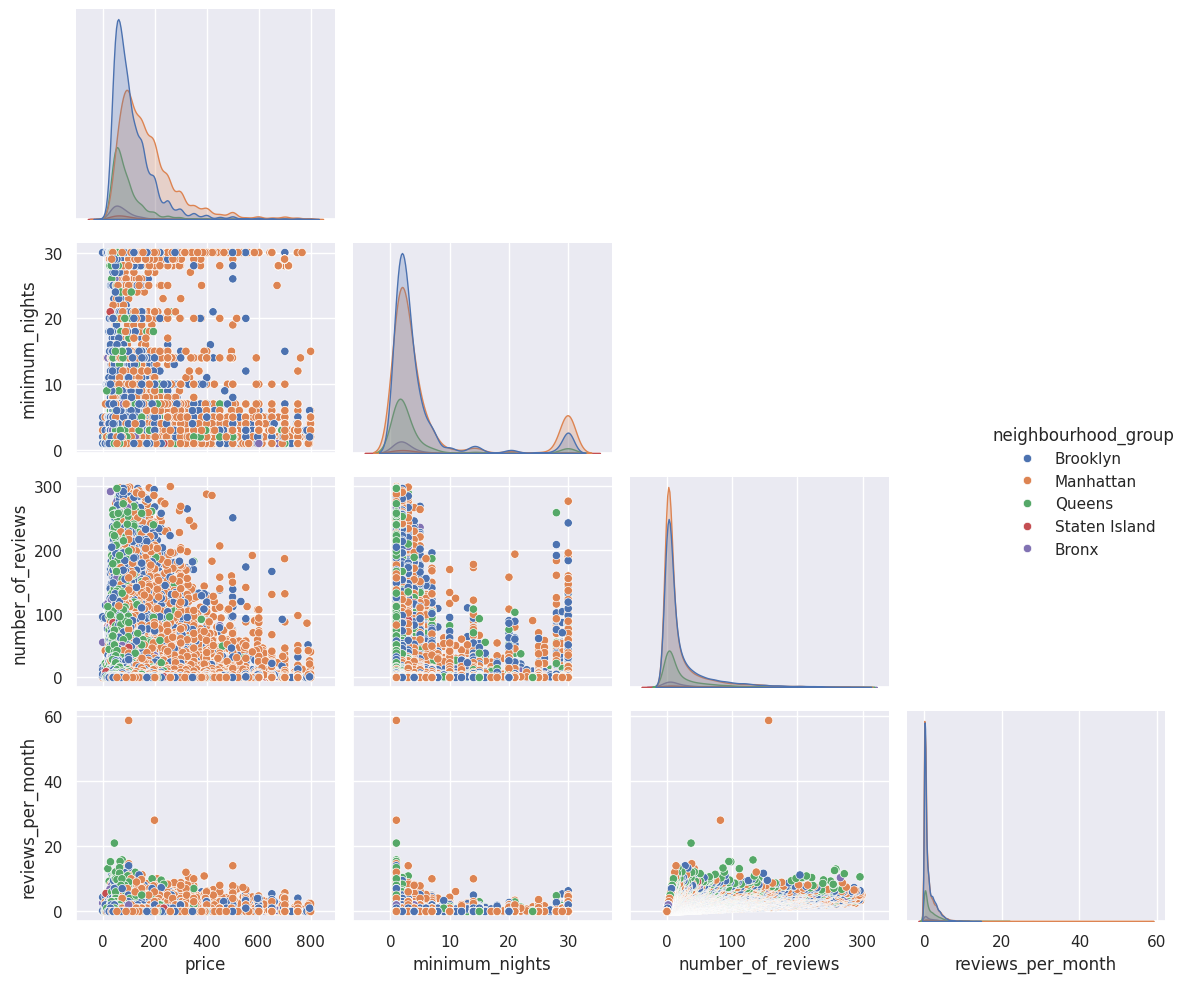

In [46]:
#Correlations between Key Metrices
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Selecting relevant columns for pairplot
# Ensure you have appropriate numerical columns in the DataFrame
pairplot_data = airbnb[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'neighbourhood_group']]

# Create a pairplot
sns.set(style='darkgrid')
plt.figure(figsize=(15, 12))
sns.pairplot(pairplot_data, corner=True, hue='neighbourhood_group')
plt.tight_layout()
plt.show()


Dynamic Bar Chart for Number of Listings by Neighbourhood Group

In [47]:
import plotly.express as px
import pandas as pd

# Group data by neighborhood
neighbourhood_group_count = airbnb['neighbourhood_group'].value_counts().reset_index()
neighbourhood_group_count.columns = ['Neighbourhood Group', 'Number of Listings']

# Create dynamic bar chart
fig = px.bar(neighbourhood_group_count, x='Neighbourhood Group', y='Number of Listings',
             color='Neighbourhood Group', title="Number of Airbnb Listings by Neighbourhood Group",
             labels={'Number of Listings': 'Number of Listings'})
fig.show()


Scatter Plot for Price vs Minimum Nights with Neighborhood Group Hue

In [48]:
import plotly.express as px
import pandas as pd

# Handle missing or invalid values (filter out rows with missing or zero price/minimum_nights)
airbnb = airbnb[(airbnb['price'] > 0) & (airbnb['minimum_nights'] > 0)].dropna(subset=['price', 'minimum_nights'])

# Create a dynamic scatter plot
fig = px.scatter(
    airbnb,
    x='price',
    y='minimum_nights',
    color='neighbourhood_group',
    title="Price vs Minimum Nights by Neighbourhood Group",
    labels={'price': 'Price', 'minimum_nights': 'Minimum Nights'},
    hover_data=['room_type', 'neighbourhood']  # Using the valid columns
)

# Limit axis ranges for better visualization
fig.update_layout(xaxis_range=[0, 1000], yaxis_range=[0, 30])  # Adjust range as needed
fig.show()


Average price by neighbourhood group and room type

In [49]:
# Calculate average price by neighbourhood group and room type
price_mean = airbnb.groupby(['neighbourhood_group', 'room_type'], as_index=False)['price'].mean()

# Create a bar plot for average price
fig = px.bar(
    price_mean,
    x='neighbourhood_group',
    y='price',
    color='room_type',
    title='Average Price by Neighbourhood Group and Room Type',
    labels={'neighbourhood_group': 'Neighbourhood Group', 'price': 'Average Price'},
    barmode='group'
)

# Customize the layout
fig.update_layout(xaxis_title='Neighbourhood Group', yaxis_title='Average Price')
fig.show()


In [50]:
# Create a pie chart for room type distribution
room_type_counts = airbnb['room_type'].value_counts().reset_index()
room_type_counts.columns = ['room_type', 'count']

fig = px.pie(
    room_type_counts,
    values='count',
    names='room_type',
    title='Distribution of Listings by Room Type',
    hole=0.7
)

fig.show()


### Summary of Insights and Recommendations

- **Market Focus**: The top 10 hosts mainly offer Entire Home/Apartment and Private Room rentals priced between $200 and $400, concentrated in Manhattan and Brooklyn. Airbnb should prioritize acquiring more listings in these areas within the $190 to $400 price range to meet demand.

- **Resource Allocation**: Most listings are in Manhattan and Brooklyn, where prices differ significantly from other neighborhoods. To increase revenue and engagement, Airbnb should enhance marketing efforts and resources in these high-demand areas.

- **Pricing Strategy**: About 80% of listings are under $200, with Private and Shared Rooms often below $100. To capitalize on demand, Airbnb should adjust pricing to keep Entire Home/Apartment listings below $200.

- **Premium Offerings**: Entire Home/Apartment listings typically attract customers seeking premium experiences. Airbnb should highlight unique features of these listings to attract higher-paying guests.

- **Feedback Optimization**: Properties with shorter stay durations receive more customer feedback, especially those priced between $100 and $200. Encouraging shorter stays can help generate more reviews while optimizing prices for flexibility and affordability.

## **Thank You**